In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import scipy.stats as stats

In [2]:
alt.renderers.enable('notebook')
import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv('data/season-1819.csv')
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2018-08-10,Man United,Leicester,2,1,H,1,0,H,A Marriner,...,6,4,11,8,2,5,2,1,0,0
1,2018-08-11,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,...,4,1,11,9,7,4,1,1,0,0
2,2018-08-11,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,...,6,9,9,11,5,5,1,2,0,0
3,2018-08-11,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,...,1,4,9,8,2,5,2,1,0,0
4,2018-08-11,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,...,2,5,11,12,3,5,2,2,0,0


In [4]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 22 columns):
Date        261 non-null object
HomeTeam    261 non-null object
AwayTeam    261 non-null object
FTHG        261 non-null int64
FTAG        261 non-null int64
FTR         261 non-null object
HTHG        261 non-null int64
HTAG        261 non-null int64
HTR         261 non-null object
Referee     261 non-null object
HS          261 non-null int64
AS          261 non-null int64
HST         261 non-null int64
AST         261 non-null int64
HF          261 non-null int64
AF          261 non-null int64
HC          261 non-null int64
AC          261 non-null int64
HY          261 non-null int64
AY          261 non-null int64
HR          261 non-null int64
AR          261 non-null int64
dtypes: int64(16), object(6)
memory usage: 44.9+ KB


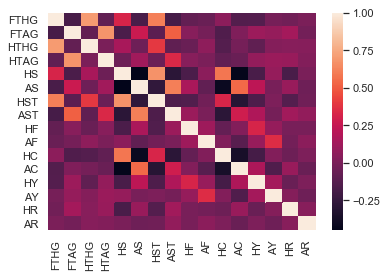

In [6]:
# Correlation Matrix of the dataset
sns.set()
sns.heatmap(df.corr())

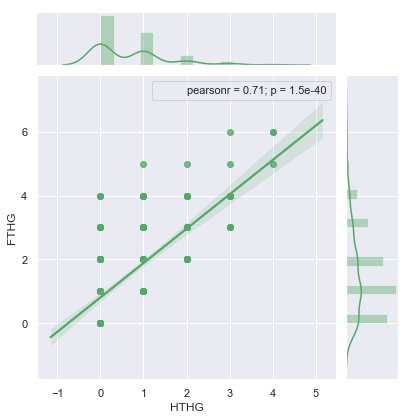

In [7]:
# Jointplot to find correlation between half time goals and full time goals.
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(df.HTHG, df.FTHG, kind='reg', color="g")
j.annotate(stats.pearsonr)

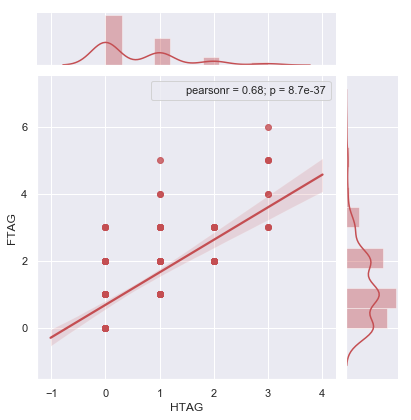

In [8]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(df.HTAG, df.FTAG, kind='reg', color="r")
j.annotate(stats.pearsonr)

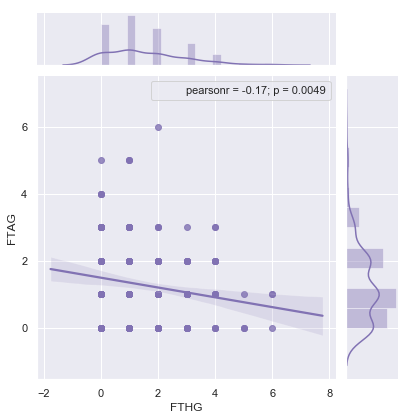

In [9]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(df.FTHG, df.FTAG, kind='reg', color="m")
j.annotate(stats.pearsonr)

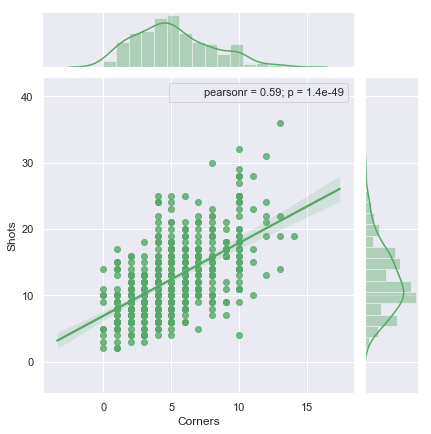

In [10]:
# Corners and Shot dependence
corners = pd.concat([df['HC'], df['AC']])
shots = pd.concat([df['HS'], df['AS']])

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(corners, shots, kind='reg', color="g")
j.annotate(stats.pearsonr)
plt.xlabel('Corners')
plt.ylabel('Shots')
plt.show('j')

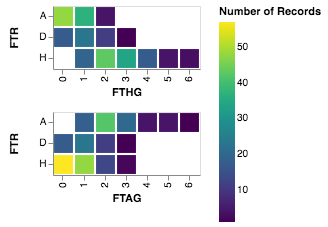

In [11]:
alt.Chart(df).mark_rect().encode(
    alt.X('FTHG:N'),
    alt.Y('FTR'),
    alt.Color('count()'),
) & alt.Chart(df).mark_rect().encode(
    alt.X('FTAG:N'),
    alt.Y('FTR'),
    alt.Color('count()'),
)

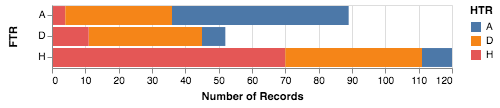

In [92]:
# Home and Away
alt.Chart(df).mark_bar().encode(
    alt.X('count()'),
    alt.Y('FTR'),
    color='HTR'
)

In [83]:
temp_df = df.copy()
temp_df['FTR'] = temp_df['FTR'].str.replace('A', 'L')
temp_df['FTR'] = temp_df['FTR'].str.replace('H', 'W')
chart_home = alt.Chart(temp_df).mark_bar().encode(
    x='count(FTR)',
    y='HomeTeam:N',
    color=alt.Color('FTR', sort=['W','L', 'D'], scale=alt.Scale(
            domain=['W', 'L', 'D'],
            range=['#32CD32', '#CD5C5C', 'orange']))
)

In [84]:
temp2_df = df.copy()
temp2_df['FTR'] = temp2_df['FTR'].str.replace('A', 'W')
temp2_df['FTR'] = temp2_df['FTR'].str.replace('H', 'L')
chart_away = alt.Chart(temp2_df).mark_bar().encode(
    x='count(FTR)',
    y='AwayTeam:N',
    color=alt.Color('FTR', sort=['W','L', 'D'], scale=alt.Scale(
            domain=['W', 'L', 'D'],
            range=['#32CD32', '#CD5C5C', 'orange']))
)

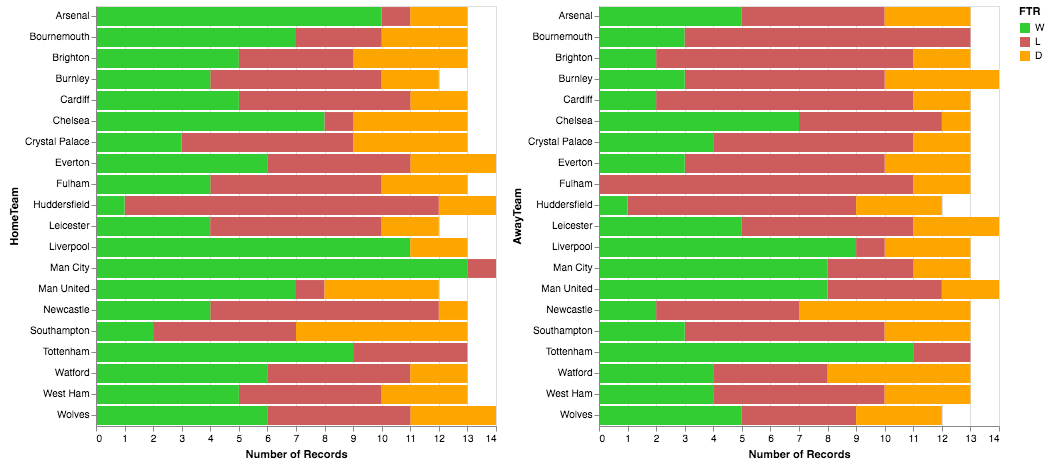

In [86]:
chart_home | chart_away

In [100]:
referee = df.copy()
referee['FTR'] = referee['FTR'].str.replace('A', 'W')
referee['FTR'] = referee['FTR'].str.replace('H', 'W')

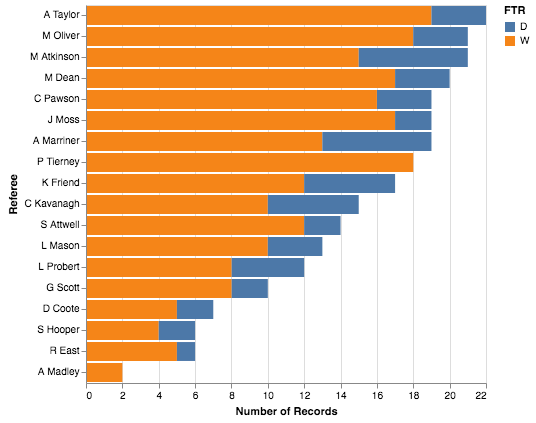

In [102]:
alt.Chart(referee).mark_bar().encode(
    alt.Y('Referee:N', sort=alt.Sort(field="Referee:N", op="count", order='descending')),
    x='count()',
    color='FTR'
)

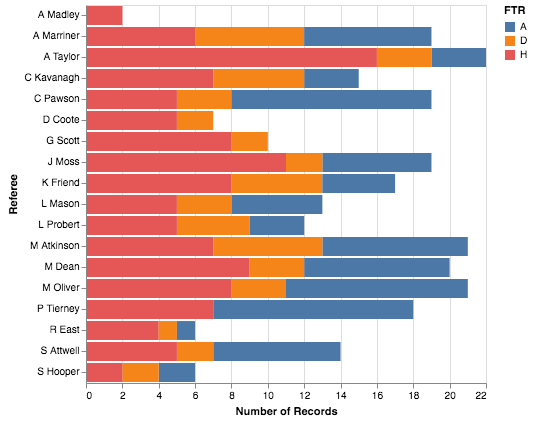

In [95]:
alt.Chart(df).mark_bar().encode(
    y='Referee:N',
    x='count()',
    color='FTR',
)

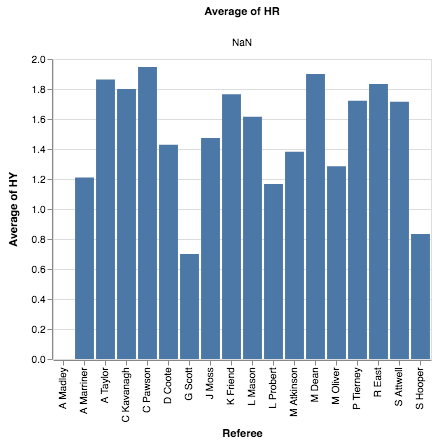

In [216]:
alt.Chart(df).mark_bar().encode(
    x='Referee',
    y='average(HY)',
    column='average(HR)'
)

In [46]:
mancity_home_df = df[df['HomeTeam']=='Man City']
mancity_away_df = df[df['AwayTeam']=='Man City']
mancity_home_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
18,2018-08-19,Man City,Huddersfield,6,1,H,3,1,H,A Marriner,...,14,1,9,4,10,3,0,2,0,0
35,2018-09-01,Man City,Newcastle,2,1,H,1,1,D,K Friend,...,8,2,5,13,4,0,0,0,0,0
43,2018-09-15,Man City,Fulham,3,0,H,2,0,H,S Attwell,...,9,3,7,7,10,4,0,0,0,0
64,2018-09-29,Man City,Brighton,2,0,H,1,0,H,L Mason,...,8,1,4,10,10,3,0,3,0,0
84,2018-10-20,Man City,Burnley,5,0,H,1,0,H,J Moss,...,10,0,11,5,10,1,2,2,0,0
108,2018-11-04,Man City,Southampton,6,1,H,4,1,H,L Mason,...,8,6,14,9,4,4,1,1,0,0
119,2018-11-11,Man City,Man United,3,1,H,1,0,H,A Taylor,...,5,1,12,12,5,1,1,1,0,0
134,2018-12-01,Man City,Bournemouth,3,1,H,1,1,D,S Attwell,...,6,1,9,3,8,4,0,0,0,0
163,2018-12-15,Man City,Everton,3,1,H,1,0,H,C Pawson,...,5,2,7,9,6,2,1,2,0,0
176,2018-12-22,Man City,Crystal Palace,2,3,A,1,2,A,A Marriner,...,5,3,7,6,13,0,0,4,0,0


In [47]:
mancity_away_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
7,2018-08-12,Arsenal,Man City,0,2,A,0,1,A,M Oliver,...,3,8,11,14,2,9,2,2,0,0
25,2018-08-25,Wolves,Man City,1,1,D,0,0,D,M Atkinson,...,2,6,13,8,5,9,1,2,0,0
52,2018-09-22,Cardiff,Man City,0,5,A,0,3,A,M Oliver,...,2,10,6,4,1,9,1,1,0,0
78,2018-10-07,Liverpool,Man City,0,0,D,0,0,D,M Atkinson,...,2,2,10,10,2,6,1,3,0,0
99,2018-10-29,Tottenham,Man City,0,1,A,0,1,A,K Friend,...,1,6,13,13,3,6,2,2,0,0
126,2018-11-24,West Ham,Man City,0,4,A,0,3,A,A Marriner,...,1,6,6,3,8,1,0,0,0,0
142,2018-12-04,Watford,Man City,1,2,A,0,1,A,P Tierney,...,7,7,4,8,3,11,0,1,0,0
154,2018-12-08,Chelsea,Man City,2,0,H,1,0,H,M Oliver,...,5,4,12,11,1,13,2,0,0,0
184,2018-12-26,Leicester,Man City,2,1,H,1,1,D,M Dean,...,5,4,5,8,3,7,2,2,0,1
199,2018-12-30,Southampton,Man City,1,3,A,1,3,A,P Tierney,...,4,6,11,10,3,8,2,3,1,0


In [90]:
alt.themes.enable('opaque')

c1 = alt.Chart(mancity_home_df).mark_bar().encode(
    x=alt.X('FTHG:Q', title='Man City Goals Scored at Home'),
    y='AwayTeam:N',
    color='FTR',
    tooltip=['HomeTeam','AwayTeam', 'FTR']
)
c2 = alt.Chart(mancity_home_df).mark_bar().encode(
    x=alt.X('FTAG:O', title='Man City Goals conceded at Home'),
    y='AwayTeam:N',
    color='FTR',
    tooltip=['HomeTeam','AwayTeam', 'FTR']
)

chart = c1 | c2

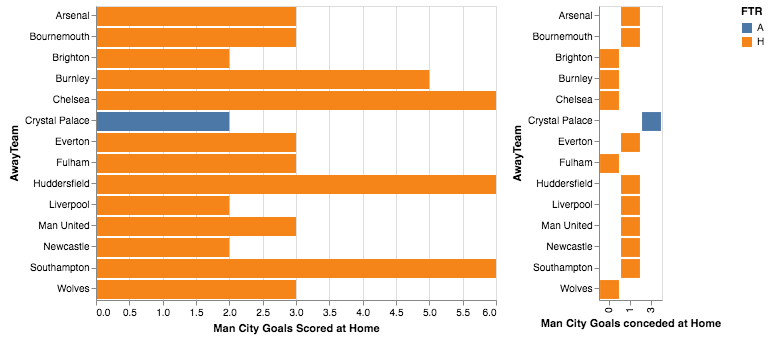

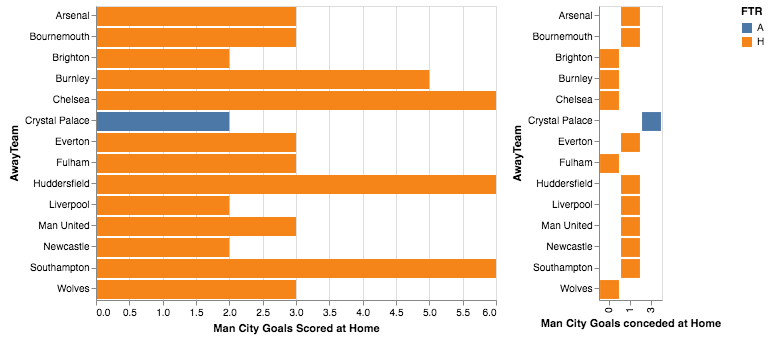

In [95]:
chart

In [73]:
alt.themes.enable('opaque')

c1 = alt.Chart(mancity_away_df).mark_bar().encode(
    x=alt.X('FTHG', title='Man City Goals Scored Away'),
    y='HomeTeam:N',
    color='FTR',
    tooltip=['HomeTeam','AwayTeam', 'FTR']
)
c2 = alt.Chart(mancity_away_df).mark_bar().encode(
    x=alt.X('FTAG', title='Man City Goals conceded Away'),
    y='HomeTeam:N',
    color='FTR',
    tooltip=['HomeTeam','AwayTeam', 'FTR']
)

chart = c1 | c2
chart.save('plots/man_city_away.png', scale_factor=7.0)

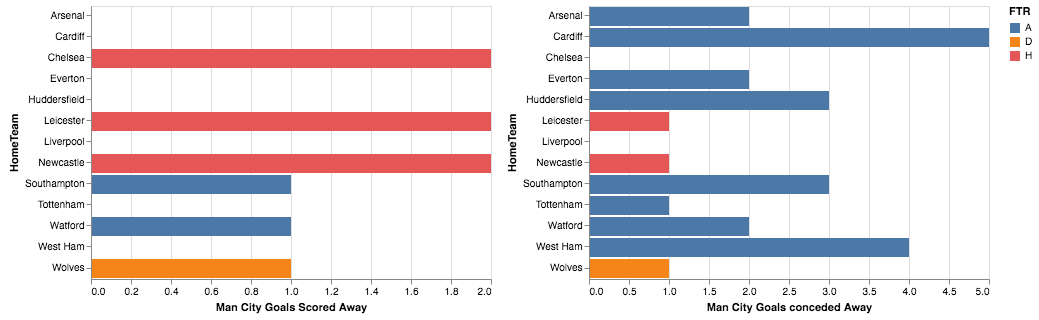

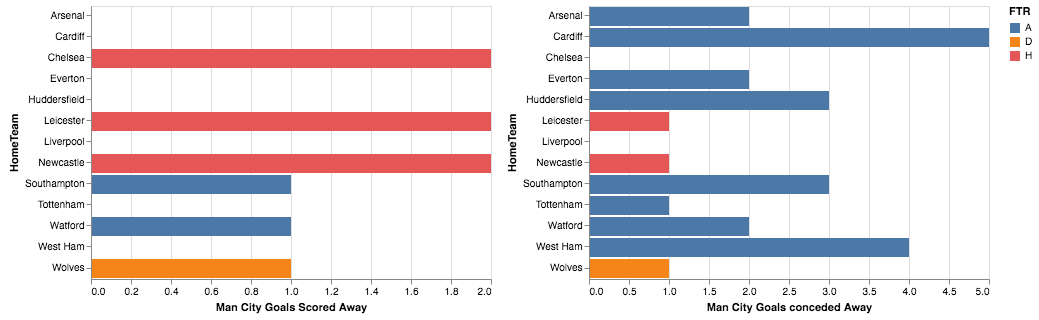

In [76]:
chart.resolve_scale()